# Analyse Exploiratoire des données

In [51]:
import pandas as pd
import scipy.stats as stats
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

data = pd.read_csv('train.csv')

In [58]:
print(data.shape)
print(data.head())

(15120, 56)
       Id  Elevation  Aspect  Slope  Horizontal_Distance_To_Hydrology  \
0  242642       2881     130     22                               210   
1  309891       3005     351     14                               242   
2  287847       3226      63     14                               618   
3  516307       3298     317      8                               661   
4  124860       3080      35      6                               175   

   Vertical_Distance_To_Hydrology  Horizontal_Distance_To_Roadways  \
0                              54                             1020   
1                             -16                             1371   
2                               2                             1092   
3                              60                              752   
4                              26                             3705   

   Hillshade_9am  Hillshade_Noon  Hillshade_3pm  ...  Soil_Type32  \
0            250             221             88  ...       

## Analyse Univarié

### Données manquantes

In [54]:
print(data.isnull().sum())

Id                                    0
Elevation                             0
Aspect                                0
Slope                                 0
Horizontal_Distance_To_Hydrology      0
Vertical_Distance_To_Hydrology        0
Horizontal_Distance_To_Roadways       0
Hillshade_9am                         0
Hillshade_Noon                        0
Hillshade_3pm                         0
Horizontal_Distance_To_Fire_Points    0
Wilderness_Area1                      0
Wilderness_Area2                      0
Wilderness_Area3                      0
Wilderness_Area4                      0
Soil_Type1                            0
Soil_Type2                            0
Soil_Type3                            0
Soil_Type4                            0
Soil_Type5                            0
Soil_Type6                            0
Soil_Type7                            0
Soil_Type8                            0
Soil_Type9                            0
Soil_Type10                           0


Il n'y a pas de données manquantes.

### Données redondantes

In [6]:
print(data.loc[data['Id'].duplicated(keep=False),:])
#Affiche les lignes de data qui ont le même 'Id'

Empty DataFrame
Columns: [Id, Elevation, Aspect, Slope, Horizontal_Distance_To_Hydrology, Vertical_Distance_To_Hydrology, Horizontal_Distance_To_Roadways, Hillshade_9am, Hillshade_Noon, Hillshade_3pm, Horizontal_Distance_To_Fire_Points, Wilderness_Area1, Wilderness_Area2, Wilderness_Area3, Wilderness_Area4, Soil_Type1, Soil_Type2, Soil_Type3, Soil_Type4, Soil_Type5, Soil_Type6, Soil_Type7, Soil_Type8, Soil_Type9, Soil_Type10, Soil_Type11, Soil_Type12, Soil_Type13, Soil_Type14, Soil_Type15, Soil_Type16, Soil_Type17, Soil_Type18, Soil_Type19, Soil_Type20, Soil_Type21, Soil_Type22, Soil_Type23, Soil_Type24, Soil_Type25, Soil_Type26, Soil_Type27, Soil_Type28, Soil_Type29, Soil_Type30, Soil_Type31, Soil_Type32, Soil_Type33, Soil_Type34, Soil_Type35, Soil_Type36, Soil_Type37, Soil_Type38, Soil_Type39, Soil_Type40, Cover_Type]
Index: []

[0 rows x 56 columns]


Il n'y a pas a priori de données redondantes.

### Données aberantes

Les données aberantes peuvent être repérées pour les attributs quantitatifs. Deux indicateurs peuvent être utilisés :
- Le Z-score : c'est l'écart d'une donnée à la moyene exprimée en écart-type : $Z = \frac{x-\mu}{\sigma}$. Des données possédants un Z-score inférieur à -3 ou supérieur à 3 sont susceptibles d'être erronées.
- Le diagramme boite à moustache qui fait ressortir les valeurs supérieures à $Q_3 + 1.5\Delta Q$ ou inférieures à supérieures à $Q_1 - 1.5\Delta Q$, où $Q_1$, $Q_3$ et $\Delta Q$ sont respectivement le premier, troisième quartile et l'écart inter-quartile.

On va avant de calculer ces indicateurs, renormaliser les données entre 0 et 1 pour des questions de praticité d'affichage. Cette renormalisation ne modifie pas les indicateurs précédents.


In [63]:
data_prov = data.copy()
cols = ["Elevation", "Aspect", "Slope", "Horizontal_Distance_To_Hydrology", "Vertical_Distance_To_Hydrology", "Horizontal_Distance_To_Roadways", "Hillshade_9am", "Hillshade_Noon", "Hillshade_3pm", "Horizontal_Distance_To_Fire_Points"]

for col in cols:
    data_prov[col] = (data_prov[col]-np.min(data_prov[col]))/(np.max(data_prov[col])-np.min(data_prov[col]))

In [64]:
#Attributs à analyser

df_zscore = pd.DataFrame() #DataFrame qui contiendra les z-score
for col in cols:
    df_zscore[col] = stats.zscore(data_prov[col])
    print(f"{col} : max={np.max(df_zscore[col])} ; min={np.min(df_zscore[col])}")

Elevation : max=2.628547215189024 ; min=-2.080331292219321
Aspect : max=1.8604176572021156 ; min=-1.420011380506091
Slope : max=3.918678423255459 ; min=-1.9400194579005843
Horizontal_Distance_To_Hydrology : max=5.486048216311695 ; min=-1.0917209604757603
Vertical_Distance_To_Hydrology : max=8.431426108909506 ; min=-3.028549910489725
Horizontal_Distance_To_Roadways : max=3.822694256859576 ; min=-1.2914994584651323
Hillshade_9am : max=1.337292780005697 ; min=-5.255957570938961
Hillshade_Noon : max=1.541210556496279 ; min=-5.258068588515639
Hillshade_3pm : max=2.529337957970688 ; min=-2.9190667488810202
Horizontal_Distance_To_Fire_Points : max=4.986245605911669 ; min=-1.367864685306218


Les attributs qui sont les plus susceptibles de présenter des valeurs abberantes sont :
- 'Slope'
- 'Horizontal_Distance_To_Hydrology'
- 'Vertical_Distance_To_Hydrology'
- 'Horizontal_Distance_To_Roadways'
- 'Hillshade_9am'
- 'Hillshade_Noon'
- 'Horizontal_Distance_To_Fire_Points'

Pour completer ce premier constat, on va désormais afficher les boîtes à moustaches, ainsi que les histogrammes de chaque attributs.

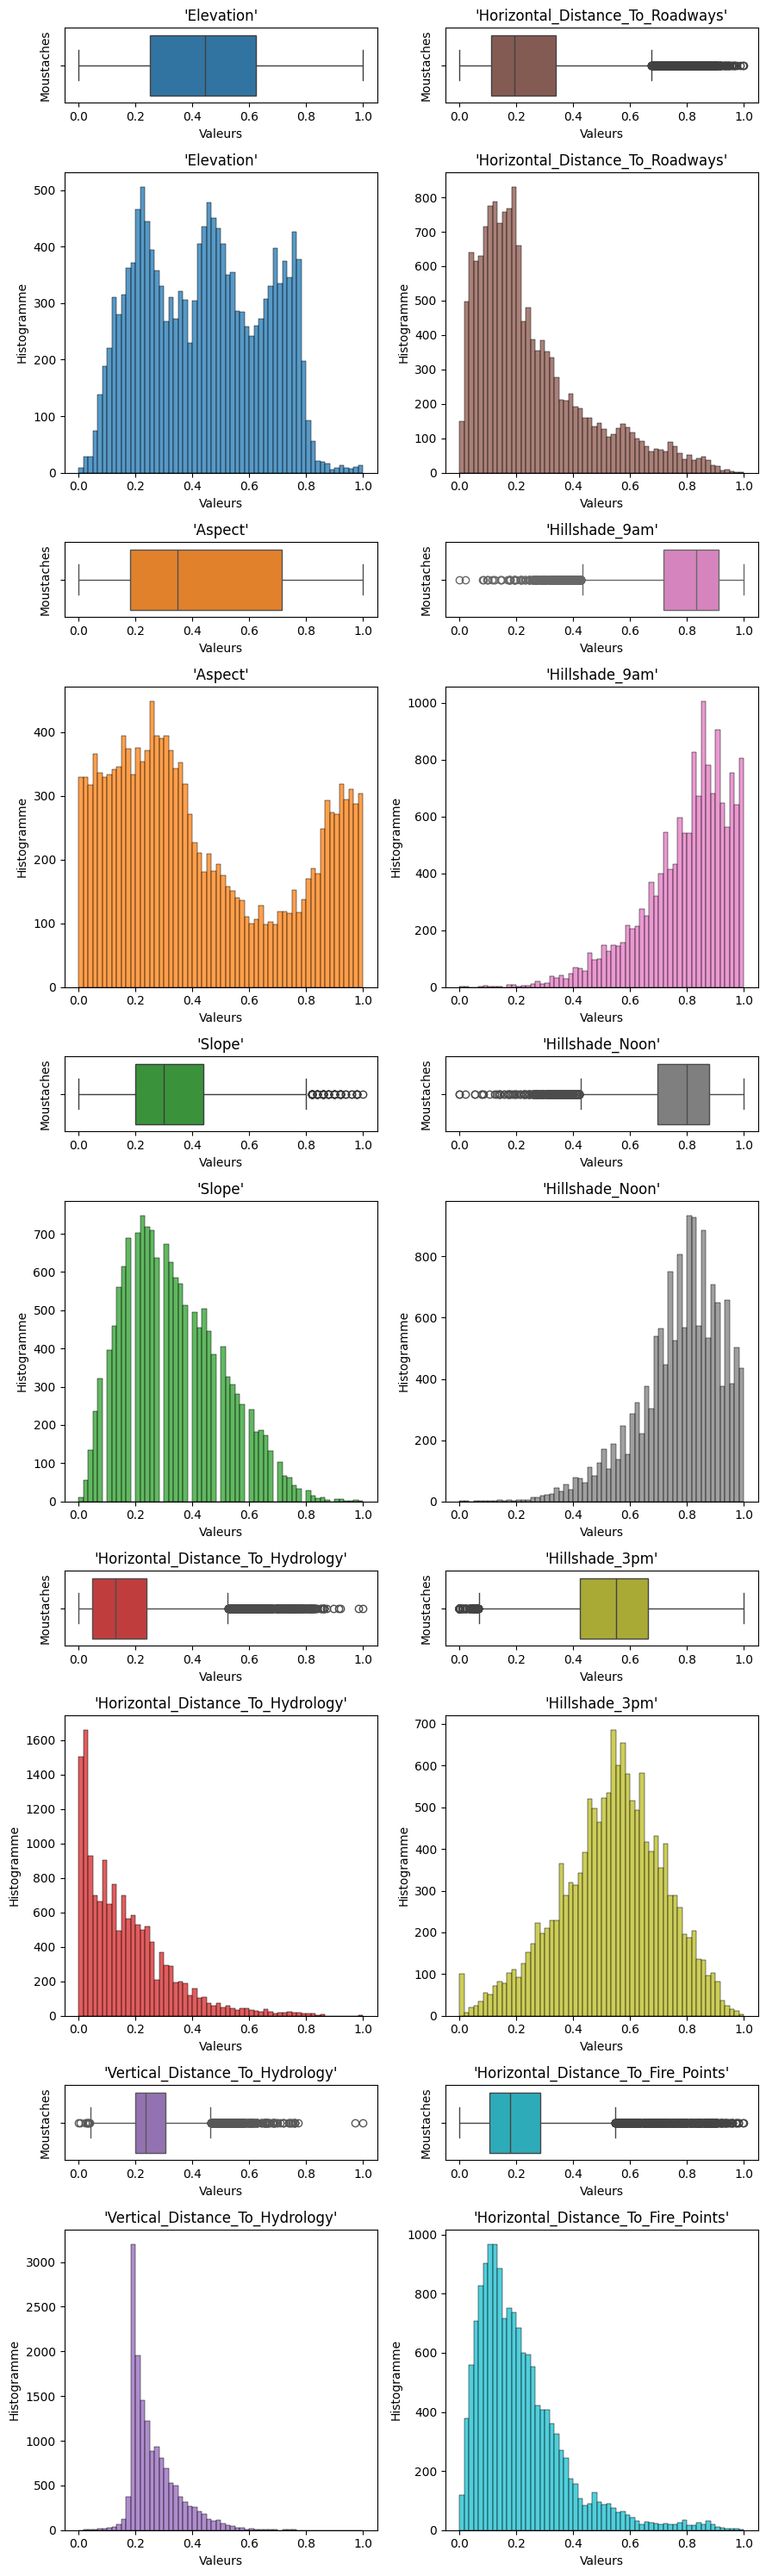

In [65]:
from matplotlib.gridspec import GridSpec

#Liste de couleurs pour faire plaisir aux yeux
colors = ['#1f77b4','#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22','#17becf']

fig = plt.figure(figsize=(9, 30))
#On fait 20 sous figures (10 boîte à moustache et 10 histogramme)
#Et on laisse plus de hauter pour les histogrammes pour la visibilité
gs = GridSpec(10, 2, figure=fig, height_ratios=[1, 4] * 5) 

# Boucle sur chaque attributs pour créer les sous-figures
for i in range(len(cols)):
    # Boîte à moustaches
    ax_box = fig.add_subplot(gs[(i * 2)%10 , (i * 2)//10])  # Position pour la boîte à moustaches
    sns.boxplot(data_prov[cols[i]], ax=ax_box, orient="h", color=colors[i])
    ax_box.set_title(f"'{cols[i]}'")
    ax_box.set_xlabel('Valeurs')
    ax_box.set_ylabel('Moustaches')

    # Histogramme
    ax_hist = fig.add_subplot(gs[(i * 2 + 1)%10, (i * 2 + 1)//10])  # Position pour l'histogramme
    sns.histplot(data_prov[cols[i]], bins=60, ax=ax_hist, color=colors[i])
    ax_hist.set_title(f"'{cols[i]}'")
    ax_hist.set_xlabel('Valeurs')
    ax_hist.set_ylabel('Histogramme')

# Ajustement de l'affichage
plt.tight_layout()
plt.show()


# Analyse des données